# <center> ECSE 415: Introduction to Computer Vision 
## <center>Assigment 2: Image Matching and Face Detection
<center>Author: Karim Elgammal (260920556)

In [ ]:
#README

## ECSE 415, INTRODUCTION TO COMPUTER VISION: ASSIGNMENT 2, March 8th, 2023
# 
# This project serves as an introduction to computer vision techniques deployed for four main functionalities: 
# 1. Image Classification Using HoG 
# 2. Image Stitching
# 3. Face Detection
#
## Getting Started
# In order to run the project correctly, each cell of code present should be ran in the order they appear, this is because some later cells depend on the
# functionalities implmented in previous ones. Also note that each cell should be ran exactly once before the next one is ran, 
#this is because some functions are shared accross cells. 
#
## Prerequisites
# Must extend the usage of the following libraries: NumPy, SkLearn, Scikit-Imag, os, OpenCV and Matplotlib. Please note that a celeb_faces folder must contain the 
# training faces inside the Q3 folder. Also another folder test is needed to contain the test image supplied upon submission. 
#
## License
# This project is a student project created for academic purposes at McGill University. It is not intended for commercial use and is protected under Canadian Law. 
# Permission is hereby granted for individuals within McGill University to view this project for educational purposes only. Any other use, including commercial use, redistribution, or publication is strictly prohibited. 
# This project is provided "as is" without warranty of any kind, either express or implied. McGill University and the student(s) who created this project shall not be liable for any damages resulting from the use of this project.
#
#
## Acknowledgments
# Much of the implementation of this project was only feasible due to the tutorial sessions held by A.Kumar. who is listed within the works cited at the end of the document. 
# Further it is noted that many implementations of the code below were only possible after adhering to the structure and methods referred to in lectures and tutorials of ECSE 415. 

### **1. Image Clasification using HoG**

<p align="justify">The Histogram of Gradients (HoG) feature extraction method is a useful technique used in computer vision and image processing. It is based on the distribution of gradients in an image and is particularly effective in capturing shape and edge information. HoG features have been widely used in object detection and recognition tasks, including the detection of pedestrians and faces in images. 

#### **1.1 Building a Classifier with Training Images**

<p align="justify">For the first part of the investigation, we are given a set of training images of two brand logos; Kraft and McDonald's. We are then asked to resize the images to a size of 128 x 128; and then compute the HoG features of size (32, 32, 8) for each of these images. It is noted that it was decided to perform the computations of the gradients with the greyscale conversion of the image. This allows us to work on one channel, and make the classifier color invariant. We compute the HoG features using the hog() function available within the Scikit-Image library. This function returns two objects; first the HoG features as a np array, and secondly the visualization of these HoG features. We call this hog() function within our container function compute_hog(), which allows us to compute the HoG features, extract the visualization, and perform block normalization within the same function. We did this in order to maximize readability and usability of our code.  

<p align="justify">The block normalization that was done is based on the block normalization technique seen in Carlo Tomasi's Histograms of Oriented Gradients[1]. Once the normalization was done, we flattened the HoG features returned by the hog() function. We then ran all of our training images through our compute_hog() function and gathered the results of the normalized HoG descriptors in two arrays hog_feats_norm1, and hog_feats_norm2, for the Kraft and McDonalds training image sets respectivelly. 

<p align="justify">We then combined the HoG descriptors of each of these sets into one array by using the np.vstack function. This allowed us to create one long 'stack' or array using the two arrays of the normalized HoG descriptors. Further, we created an array y, of the same size as the overall_logos array and filled the first half of said array with 0s, corresponding to a Kraft logo descriptor, and the second half with 1s, corresponding to a McDonalds logo descriptor. We use this array as our label input to the knn1.fit() function, along with the overall_logos array to fit a nearest neighbor classifier with three neighbors. 

Mounted at /content/drive


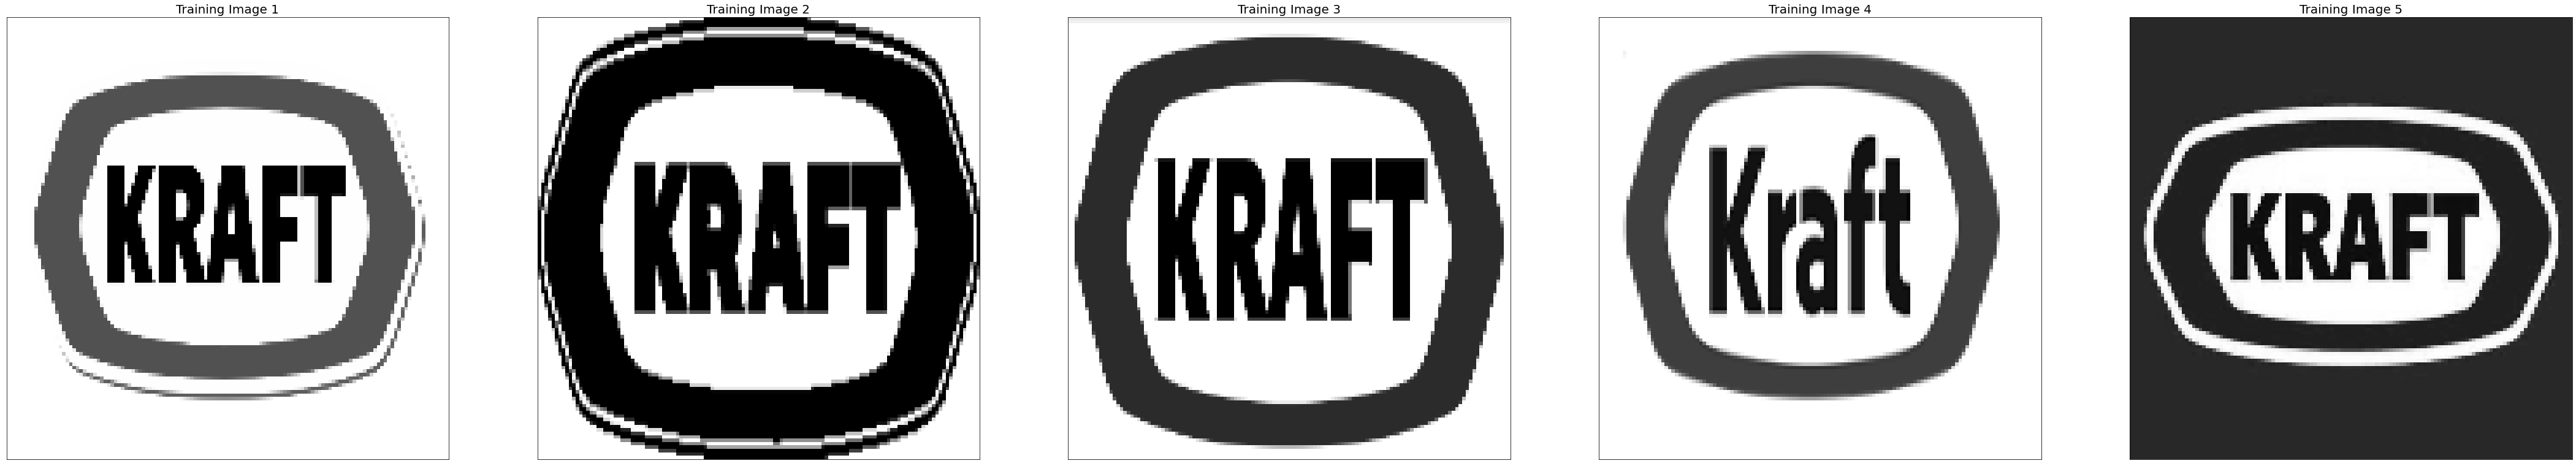

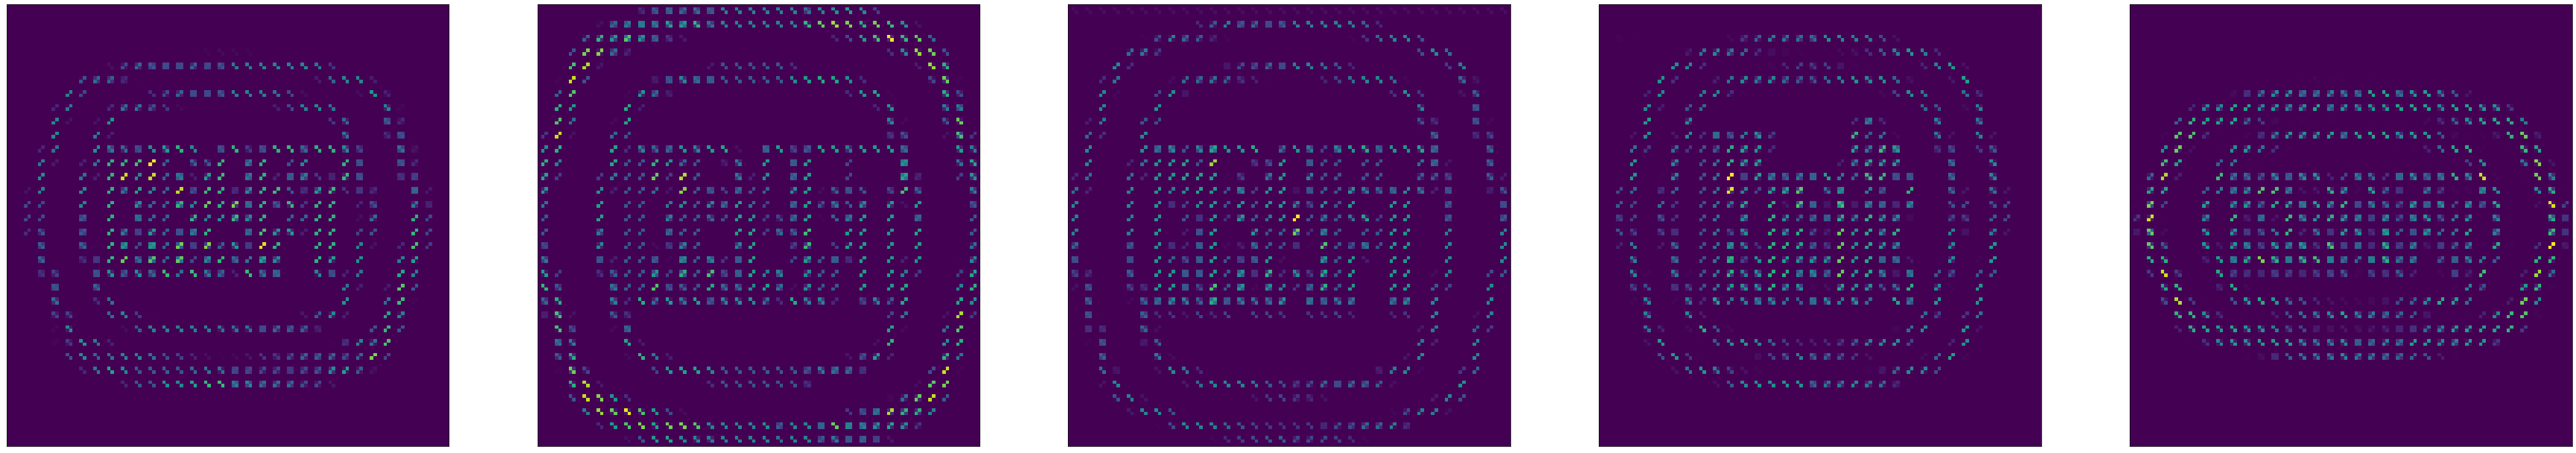

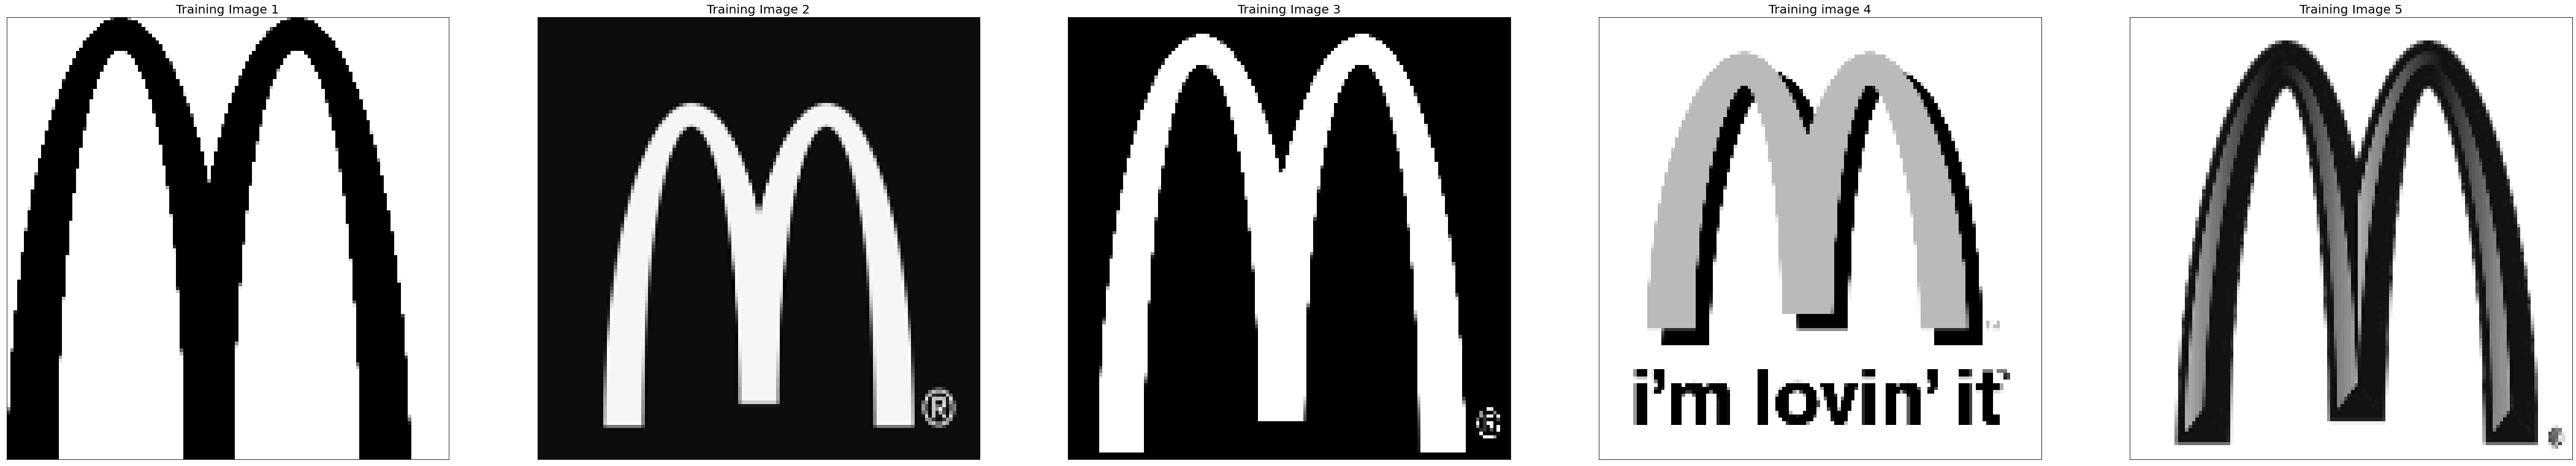

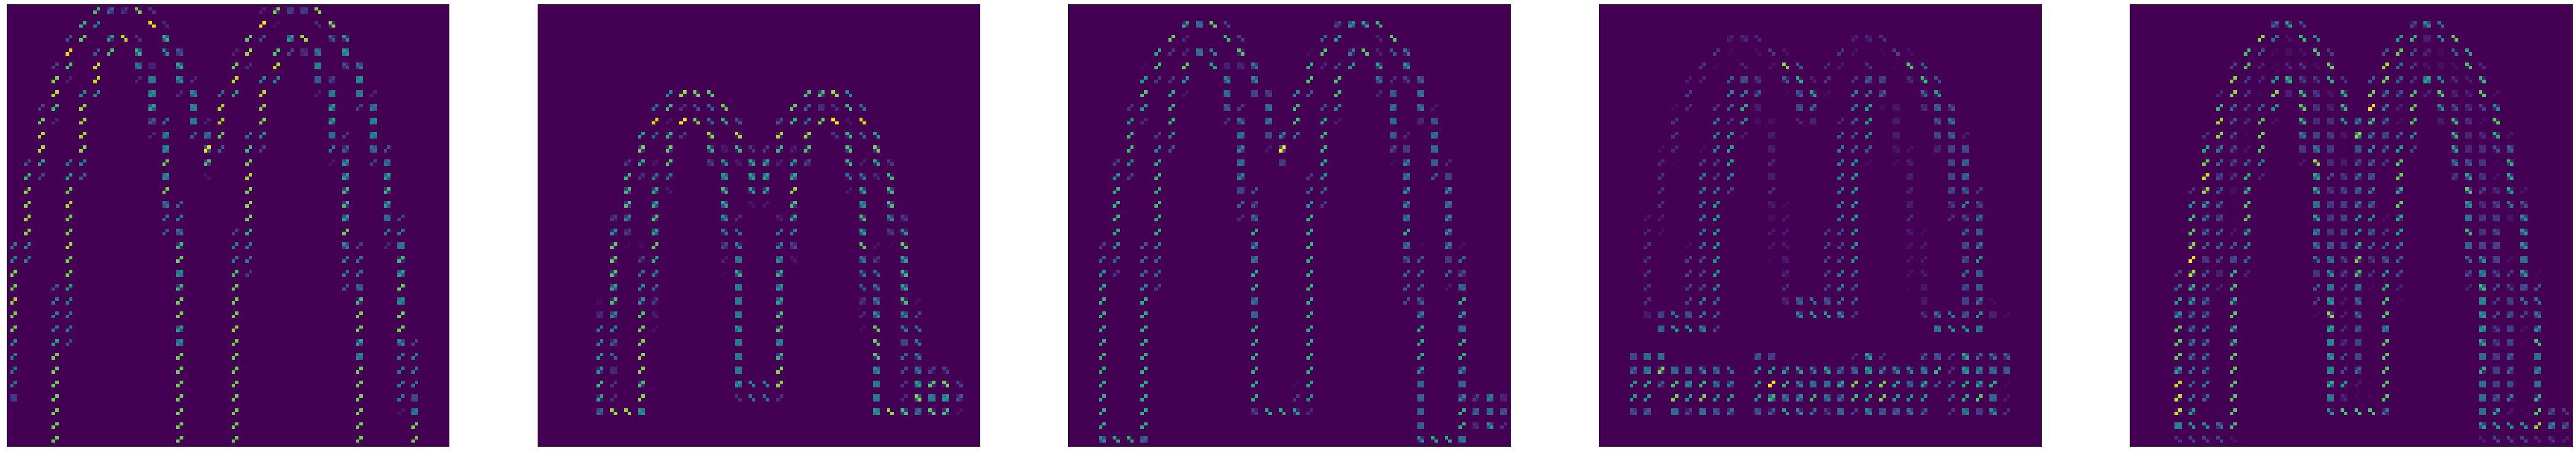

In [3]:
#Importing the neccessary libraries to implement task
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier


# #Mounting the google drive which contains the images to be processed
from google.colab import drive
drive.mount('/content/drive')

# #Defining the path of the folder that contains our images 
path_training = '/content/drive/MyDrive/ECSE_415_W_2023/Assignments/Assignment2/Q1/training/'


# path_training = "/Users/karim/Desktop/Assignment2/Assignment2_Data/Q1/training/"


# Load training images and converting them to grayscale

kimg1 = cv2.imread(path_training + "kraft_train1.jpeg")
kimg1 = cv2.cvtColor(kimg1, cv2.COLOR_BGR2GRAY)
kimg2 = cv2.imread(path_training + "kraft_train2.jpeg")
kimg2 = cv2.cvtColor(kimg2, cv2.COLOR_BGR2GRAY)
kimg3 = cv2.imread(path_training + "kraft_train3.jpeg")
kimg3 = cv2.cvtColor(kimg3, cv2.COLOR_BGR2GRAY)
kimg4 = cv2.imread(path_training + "kraft_train4.jpeg")
kimg4 = cv2.cvtColor(kimg4, cv2.COLOR_BGR2GRAY)
kimg5 = cv2.imread(path_training + "kraft_train5.jpeg")
kimg5 = cv2.cvtColor(kimg5, cv2.COLOR_BGR2GRAY)

mimg1 = cv2.imread(path_training + "mc_train1.jpeg")
mimg1 = cv2.cvtColor(mimg1, cv2.COLOR_BGR2GRAY)
mimg2 = cv2.imread(path_training + "mc_train2.jpeg")
mimg2 = cv2.cvtColor(mimg2, cv2.COLOR_BGR2GRAY)
mimg3 = cv2.imread(path_training + "mc_train3.jpeg")
mimg3 = cv2.cvtColor(mimg3, cv2.COLOR_BGR2GRAY)
mimg4 = cv2.imread(path_training + "mc_train4.jpeg")
mimg4 = cv2.cvtColor(mimg4, cv2.COLOR_BGR2GRAY)
mimg5 = cv2.imread(path_training + "mc_train5.jpeg")
mimg5 = cv2.cvtColor(mimg5, cv2.COLOR_BGR2GRAY)

# Resize images to 128 x 128
kimg1 = cv2.resize(kimg1, (128, 128))
kimg2 = cv2.resize(kimg2, (128, 128))
kimg3 = cv2.resize(kimg3, (128, 128))
kimg4 = cv2.resize(kimg4, (128, 128))
kimg5 = cv2.resize(kimg5, (128, 128))

mimg1 = cv2.resize(mimg1, (128, 128))
mimg2 = cv2.resize(mimg2, (128, 128))
mimg3 = cv2.resize(mimg3, (128, 128))
mimg4 = cv2.resize(mimg4, (128, 128))
mimg5 = cv2.resize(mimg5, (128, 128))

# Define function to compute HOG features and visualize them
def compute_hog(img):
    
    # Compute HOG features of size (32,32,8)
    hog_feat, hog_vis = hog(img, orientations=8, pixels_per_cell=(4,4), cells_per_block=(4,4), visualize=True)
    hog_feat = hog_feat.reshape((8, 8, -1))
    
    # Perform block normalization of size (4,4)
    hog_feat_norm = np.zeros_like(hog_feat)
    for i in range(hog_feat.shape[0] // 4):
        for j in range(hog_feat.shape[1] // 4):
            block = hog_feat[i*4:(i+1)*4, j*4:(j+1)*4, :]
            norm = np.sqrt(np.sum(block**2) + 1e-5)
            hog_feat_norm[i*4:(i+1)*4, j*4:(j+1)*4, :] = block / norm
    
    return hog_vis, hog_feat_norm.reshape(-1)


# Load 2 sets of 5 images
set1 = [kimg1, kimg2, kimg3, kimg4, kimg5]
set2 = [mimg1, mimg2, mimg3, mimg4, mimg5]


# Compute HOG features and visualize them for set 1
hog_feats1 = []
hog_feats_norm1 = []
for img_file in set1:
    hog_feat, hod_feat_n  = compute_hog(img_file)
    hog_feats1.append(hog_feat)
    hog_feats_norm1.append(hod_feat_n)
    
# Compute HOG features and visualize them for set 2
hog_feats2 = []
hog_feats_norm2 = []
for img_file in set2:
    hog_feat, hod_feat_n = compute_hog(img_file)
    hog_feats2.append(hog_feat)
    hog_feats_norm2.append(hod_feat_n)



# Combine HOG features into numpy arrays and create label vector
X_logo1 = np.vstack(hog_feats_norm1)
X_logo2 = np.vstack(hog_feats_norm2)
y = np.concatenate((np.zeros(len(X_logo1)), np.ones(len(X_logo2))))

overall_logos = np.vstack((X_logo1, X_logo2))

#Fitting a nearest neighbor classifier with three neighbors (Using the KNeighborsClassifier from sklearn library).
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(overall_logos, y)


# Displaying the original images, Kraft
plt.figure(figsize=(75, 25))
plt.subplot(1,5,1), plt.imshow(set1[0], cmap="gray")
plt.title("Training Image 1", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,2), plt.imshow(set1[1], cmap="gray")
plt.title("Training Image 2", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,3), plt.imshow(set1[2], cmap="gray")
plt.title("Training Image 3", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,4), plt.imshow(set1[3], cmap="gray")
plt.title("Training Image 4", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,5), plt.imshow(set1[4], cmap="gray")
plt.title("Training Image 5", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.show()

# Displaying the visualization of HoG Features, Kraft 
plt.figure(figsize=(75, 25))
plt.subplot(1,5,1), plt.imshow(hog_feats1[0])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,2), plt.imshow(hog_feats1[1])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,3), plt.imshow(hog_feats1[2])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,4), plt.imshow(hog_feats1[3])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,5), plt.imshow(hog_feats1[4])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.show()


# Displaying the original images, McDonalds
plt.figure(figsize=(75, 25))
plt.subplot(1,5,1), plt.imshow(set2[0], cmap="gray")
plt.title("Training Image 1", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,2), plt.imshow(set2[1], cmap="gray")
plt.title("Training Image 2", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,3), plt.imshow(set2[2], cmap="gray")
plt.title("Training Image 3", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,4), plt.imshow(set2[3], cmap="gray")
plt.title("Training image 4", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,5), plt.imshow(set2[4], cmap="gray")
plt.title("Training Image 5", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.show()

# Displaying the visualization of HoG Features, McDonalds 
plt.figure(figsize=(75, 25))
plt.subplot(1,5,1), plt.imshow(hog_feats2[0])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,2), plt.imshow(hog_feats2[1])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,3), plt.imshow(hog_feats2[2])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,4), plt.imshow(hog_feats2[3])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,5,5), plt.imshow(hog_feats2[4])
plt.title("", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.show()





#### **1.2 Classifying Test Images**

<p align="justify">We were then given a set of test images to test our classifier that we created in the preceding section. The test image set contains 2 images of the McDonald's logo and 2 images of the Kraft logo. Each image has varying orientations, and components; which help us verify the effectiveness of our classifier, where validation occurs with our knowledge of the test images. And so, by using the knn1.perdict() function we ran our images through the classifier. The function returns a number from the array we created in the preceding section, which gets translated to a text label depicitng the logo. 

<p align="justify">As seen from the plots below, our classifier succsessfully recognized the correct label for 3 out of the 4 images. Testing images 1 and 3 are simple variations of the training sets, while testing image 2 introduces additional components and yet the classifier was able to perdict the label correctly. Testing image 4 on the other hand was identified incorrectly; and this is due to the image being a rotated logo. While the HoG features are invariant to translation, they are not rotation invariant by themselves. The rotation of the logo can cause the gradient orientations to be shifted, which can affect the accuracy of the HoG features, which is what we see happen in the case of testing image 4. 

<p align="justify">HoG features are based on analyzing the local gradient orientation in an image, which provides a robust and distinctive representation of the image features. The HoG features are able to capture the edges and corners of objects, which can be useful for detecting the shape and structure of objects in an image. For objects under rotation however, HoG classifiers alone cannot be used, instead a technique such as the SIFT or SURF can be used as they are rotation invariant.[2] 

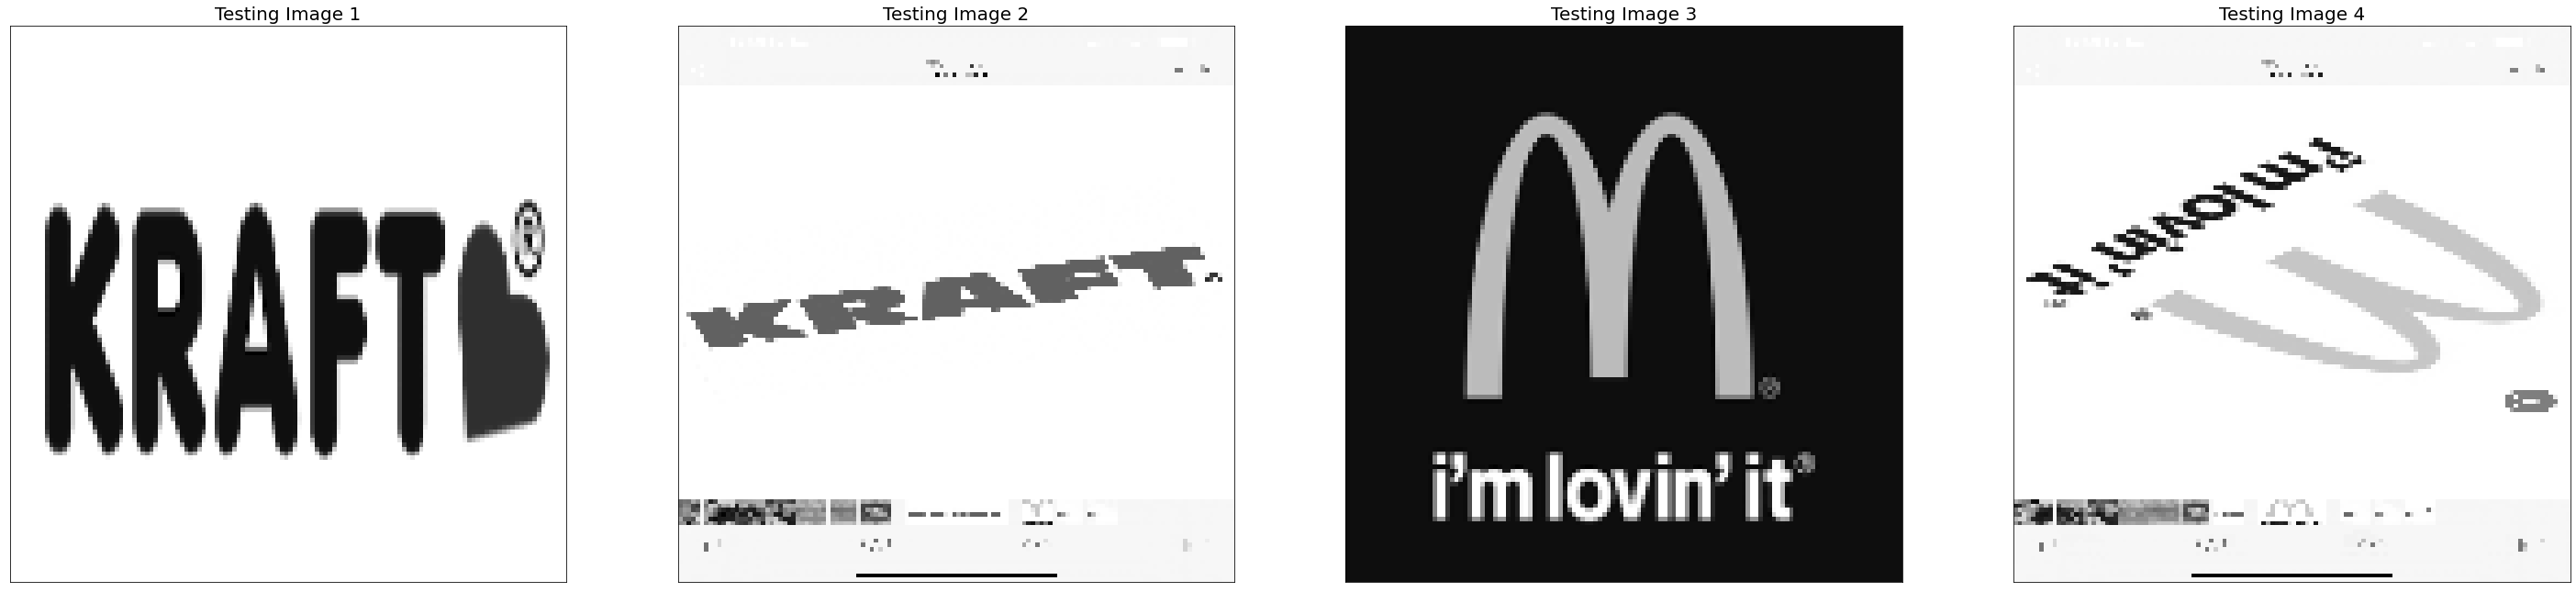

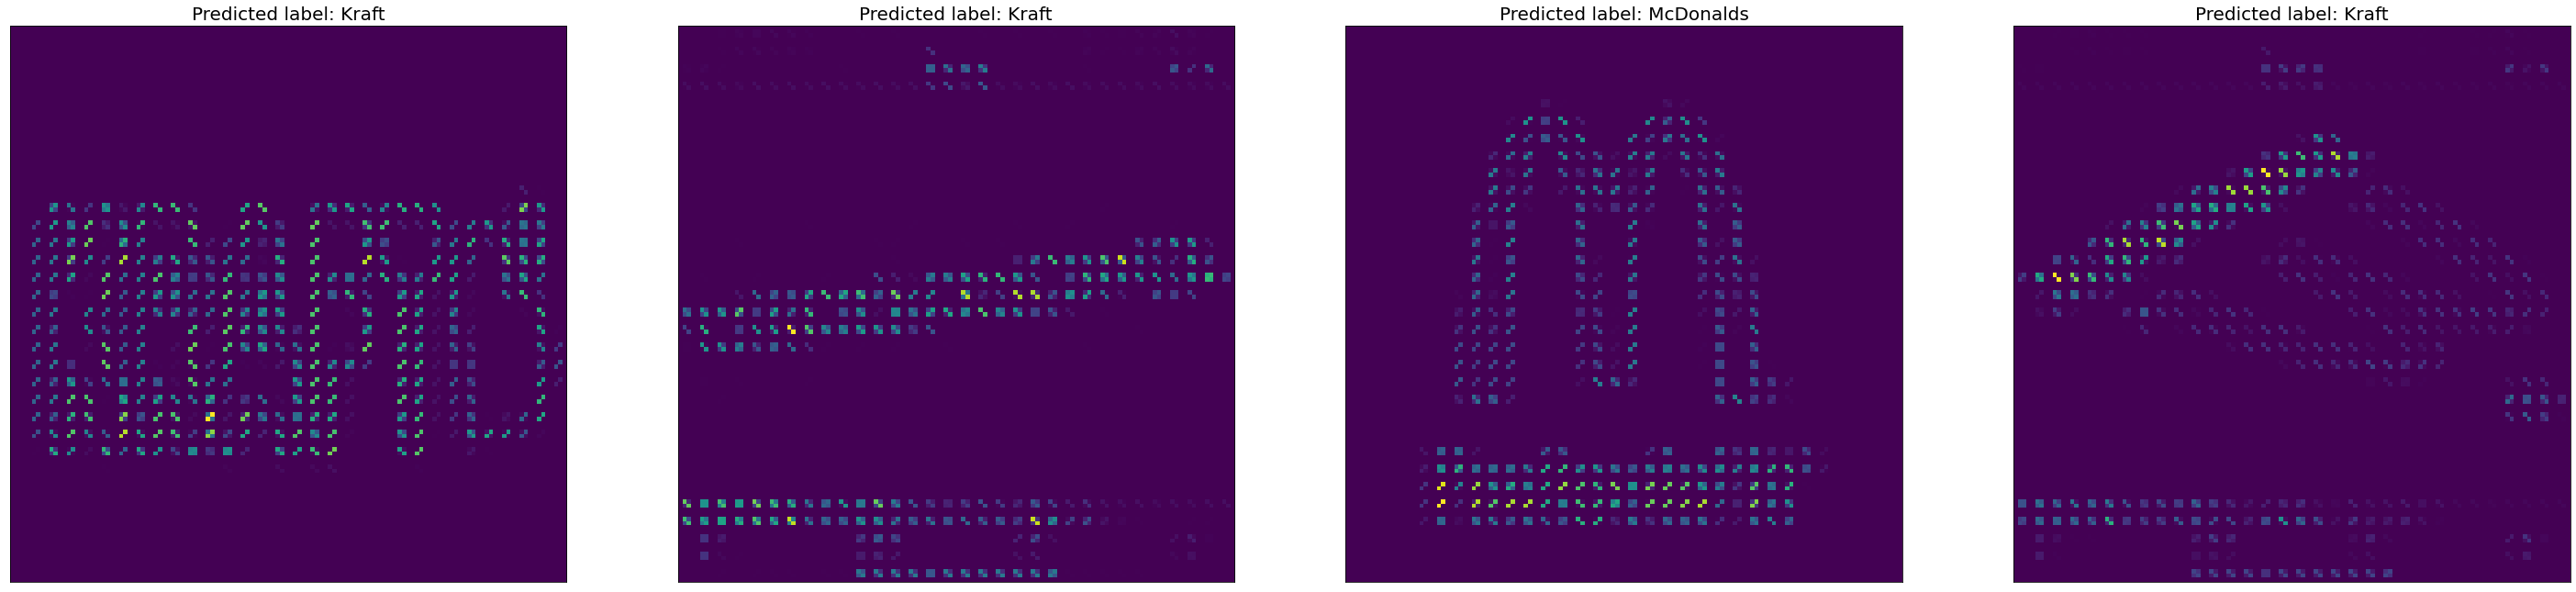

In [4]:
path_testing = '/content/drive/MyDrive/ECSE_415_W_2023/Assignments/Assignment2/Q1/test/'

# path_testing = "/Users/karim/Desktop/Assignment2/Assignment2_Data/Q1/test/"

test = []

# Load testing images and converting them to grayscale
timg1 = cv2.imread(path_testing + "kraft_test1.png")
timg1 = cv2.cvtColor(timg1, cv2.COLOR_BGR2GRAY)
timg1 = cv2.resize(timg1, (128, 128))
test.append(timg1)

timg2 = cv2.imread(path_testing + "kraft_test2.PNG")
timg2 = cv2.cvtColor(timg2, cv2.COLOR_BGR2GRAY)
timg2 = cv2.resize(timg2, (128, 128))
test.append(timg2)

timg3 = cv2.imread(path_testing + "mc_test2.jpeg")
timg3 = cv2.cvtColor(timg3, cv2.COLOR_BGR2GRAY)
timg3 = cv2.resize(timg3, (128, 128))
test.append(timg3)

timg4 = cv2.imread(path_testing + "mc_test2.PNG")
timg4 = cv2.cvtColor(timg4, cv2.COLOR_BGR2GRAY)
timg4 = cv2.resize(timg4, (128, 128))
test.append(timg4)

# Compute HOG features and visualize them for test set
hog_feats_test = []
hog_feats_norm_test = []
for img_file in test:
    hog_feat, hod_feat_n  = compute_hog(img_file)
    hog_feats_test.append(hog_feat)
    hog_feats_norm_test.append(hod_feat_n)


# Predict label of test image using KNN classifier for test 1
label1 = knn1.predict([hog_feats_norm_test[0]])[0]
if(label1 == 0):
  label1 = "Kraft"
else:
  label1 = "McDonalds"

# Predict label of test image using KNN classifier for test 2
label2 = knn1.predict([hog_feats_norm_test[1]])[0]
if(label2 == 0):
  label2 = "Kraft"
else:
  label2 = "McDonalds"


# Predict label of test image using KNN classifier for test 3
label3 = knn1.predict([hog_feats_norm_test[2]])[0]
if(label3 == 0):
  label3 = "Kraft"
else:
  label3 = "McDonalds"

# Predict label of test image using KNN classifier for test 4
label4 = knn1.predict([hog_feats_norm_test[3]])[0]
if(label4 == 0):
  label4 = "Kraft"
else:
  label4 = "McDonalds"



# Displaying the original images, Test
plt.figure(figsize=(50, 25))
plt.subplot(1,4,1), plt.imshow(test[0], cmap="gray")
plt.title("Testing Image 1", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2), plt.imshow(test[1], cmap="gray")
plt.title("Testing Image 2", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3), plt.imshow(test[2], cmap="gray")
plt.title("Testing Image 3", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4), plt.imshow(test[3], cmap="gray")
plt.title("Testing Image 4", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.show()

# Displaying the visualization of HoG Features, Test  
plt.figure(figsize=(50, 25))
plt.subplot(1,4,1), plt.imshow(hog_feats_test[0])
plt.title(f"Predicted label: {label1}", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,2), plt.imshow(hog_feats_test[1])
plt.title(f"Predicted label: {label2}", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,3), plt.imshow(hog_feats_test[2])
plt.title(f"Predicted label: {label3}", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,4,4), plt.imshow(hog_feats_test[3])
plt.title(f"Predicted label: {label4}", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.show()



###**2. Image Stitching**

<p align="justify">This question involved computing SIFT keypoints and descriptors for supplied image 1 and image 2, then finding the matching keypoints in both images and displaying the 20 best pairs. Based on these 20 pairs a homography was found using RANSAC to transform image 1 and stitch it with the original image 2 using pyramid  blending. To create a stitched image 12, we warped image 1 using the supplied built in functions, then passed the transformed image and the image to be overlayed to our function pyramid_blend(). This function which was adapted from Gandhi's[3], allows us to stitch by first creating a Laplacian pyramid for each image. The pyramid is then blended by weighting the images at each level according to a Gaussian pyramid, and the resulting blended image is reconstructed from the Laplacian pyramid levels.

<p align="justify">We repeated this process between image 12 and image 3, where 20 best matching keypoints were displayed, and a homography was found using RANSAC to transform image 3 and stitch it with image 12 using linear image blending to create the final image. The linear blending function we used, stitch_images() took equal weights of both images in areas which were contested between the two images being stitched.

<p align="justify">In comparing the two blending methods, I would prefer pyramid blending because it produces smoother transitions between the images and provides a better overall result. However, it can be computationally expensive and may introduce artifacts as we see in our code; the pyramid blending introduces values for black that are RGB= 5,5,5, and so we had to manually remove these artifacts from the image. Linear blending is simpler, but it produces visible seams and requires manual adjustments to achieve a satisfactory result without the blur it causes. 

<p align="justify">It is noted that the ratio test is adapted from Lowe's paper in trying to optimize the SIFT detection[4]. Further, while the sift operations automaticallly convert the images to grayscale, we perform the conversion as good practice for readability. It is further noted that a pyramid level of 4 was chosen as it caused the best tradeoff between artifacts and high frequency components.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


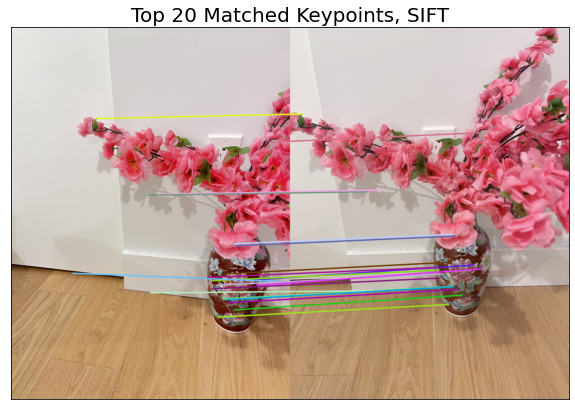

In [5]:
#Importing the neccessary libraries to implement task
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn.neighbors import KNeighborsClassifier

# #Mounting the google drive which contains the images to be processed
from google.colab import drive
drive.mount('/content/drive')

path_stitching = '/content/drive/MyDrive/ECSE_415_W_2023/Assignments/Assignment2/Q2/'

# For local run
# path_stitching= "/Users/karim/Desktop/Assignment2/Assignment2_Data/Q2/"

def resize_init(img):

  width = int(img.shape[1] * 0.6)
  height = int(img.shape[0] * 0.6)
  dim = (width, height)
# Resize the image
  img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return img

#Fetch image 1
img1_path = path_stitching + "image1.jpeg"
img1 = cv2.imread(img1_path)
img1 = resize_init(img1)

#Fetch image 2
img2_path = path_stitching + "image2.jpeg"
img2 = cv2.imread(img2_path)
img2 = resize_init(img2)

#Fetch image 3
img3_path = path_stitching + "image3.jpeg"
img3 = cv2.imread(img3_path)
img3 = resize_init(img3)

def compute_sift(img1, img2):

#Convert the images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Initialize the SIFT detector
    sift = cv2.SIFT_create()

#Compute the keypoints and descriptors for the two images
    kp1, des1 = sift.detectAndCompute(gray1, None)
    kp2, des2 = sift.detectAndCompute(gray2, None)

#Create a BFMatcher object
    bf = cv2.BFMatcher()

#Match the keypoints
    matches = bf.knnMatch(des1, des2, k=2)

#Apply ratio test 
    good_matches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)

# Sort the matches by distance
    good_matches = sorted(good_matches, key=lambda x: x.distance)
# Take only the top 20 matches
    good_matches = good_matches[:20]

# Draw the 20 best matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, 8, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS, matchColor=None, singlePointColor=None)

    return kp1, des1, kp2, des2, good_matches, img_matches

kp12, des12, kp21, des21, matches12, drawn_image = compute_sift(img1, img2)

# Display the matches
fig = plt.figure(figsize=(10, 10))
plt.title("Top 20 Matched Keypoints, SIFT", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.imshow(cv2.cvtColor(drawn_image, cv2.COLOR_BGR2RGB))
plt.show()

(Text(0.5, 1.0, 'Untransformed Image 2'), ([], []), ([], []))

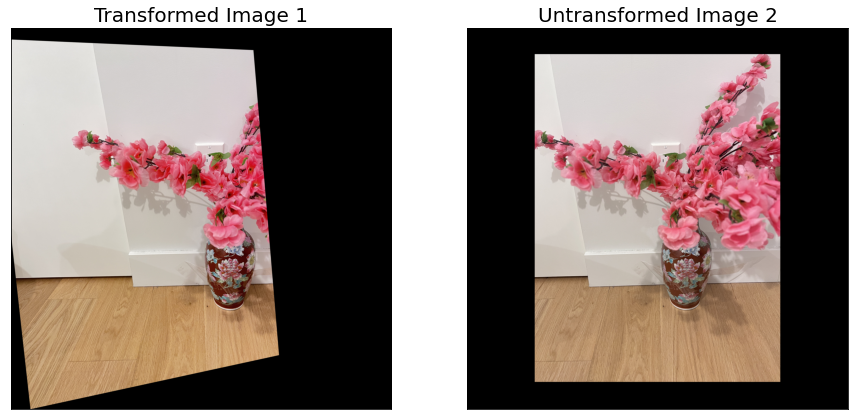

In [6]:
img2 = cv2.copyMakeBorder(img2,200,200,500,500, cv2.BORDER_CONSTANT)
kp1, des1, kp2, des2, good_matches, drawn_image = compute_sift(img1, img2)

def find_homography(matches, kp1, kp2, img1, img2):

    kpm1, kpm2 = ([ kp1[m.queryIdx].pt for m in matches ],[ kp2[m.trainIdx].pt for m in matches ])
# Convert the keypoints to numpy arrays
    src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
# Find the homography using RANSAC
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5)
    h, w = img1.shape[:2]
    img_transformed = cv2.warpPerspective(img1, M, (img2.shape[1],img2.shape[0]))

    return img_transformed, img2, M, mask, kpm1, kpm2,  

tran_img, untran_img, homography_matrix, mask, k1, k2 = find_homography(good_matches, kp1, kp2, img1, img2)

fig = plt.figure(figsize=(15, 15))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(tran_img, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image 1", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(untran_img, cv2.COLOR_BGR2RGB))
plt.title("Untransformed Image 2", fontsize = 20), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Transformed Image 12'), ([], []), ([], []))

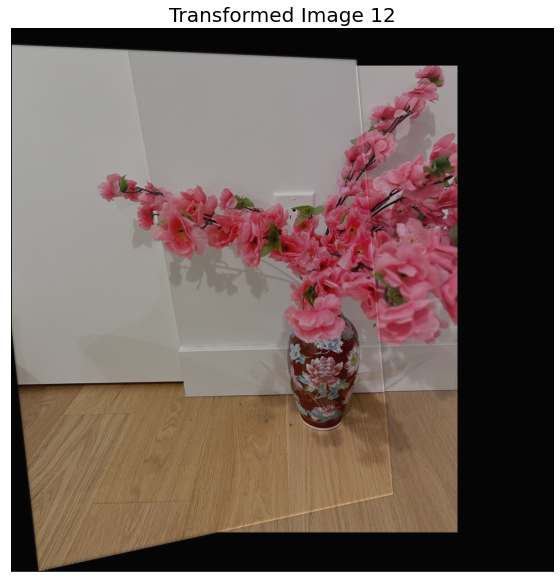

In [7]:
transfer_mask = np.ones_like(img1, dtype='float32')
transfer_mask = cv2.warpPerspective(transfer_mask, homography_matrix, (untran_img.shape[1],untran_img.shape[0]))

# Function name: pyramid_blend
#
# Input: A and B are the input images to be blended, and m is the mask that describes the transformation that relates image A and B
#
# Output: returns an image reconstruction of the blended image from its laplacien pyramid. 
#
# Function Description: 
#This function performs pyramid blending on two images using a blending mask. 
#First, it constructs a Laplacian pyramid for each image, then blends the images at each level of the pyramid using the blending mask. 
#Finally, the blended pyramid is reconstructed to form the final blended image.
# The function allows for an optional argument for the number of pyramid levels, which can affect the computational time and output quality.

# Function Citation: Adapted from: 
#Gandhi, Nisha (2017). Function name Laplacian_blending. https://github.com/nishagandhi/Panoramas-and-Image-Alignment/blob/master/main.py
#

def pyramid_blend(A, B, m, num_levels=4):
# generate Gaussian pyramid for A,B and mask
    GA = A.copy()
    GB = B.copy()
    GM = m.copy()
    gpA = [GA]
    gpB = [GB]
    gpM = [GM]
    for i in range(num_levels):
        GA = cv2.pyrDown(GA)
        GB = cv2.pyrDown(GB)
        GM = cv2.pyrDown(GM)
        gpA.append(np.float32(GA))
        gpB.append(np.float32(GB))
        gpM.append(np.float32(GM))

# generate Laplacian Pyramids for A,B and masks
    lpA = [gpA[num_levels - 1]]  # the bottom of the Lap-pyr holds the last (smallest) Gauss level
    lpB = [gpB[num_levels - 1]]
    gpMr = [gpM[num_levels - 1]]
    for i in range(num_levels - 1, 0, -1):
        # Laplacian: subtarct upscaled version of lower level from current level
        # to get the high frequencies
        resized_pyr_img1 = cv2.resize(cv2.pyrUp(gpA[i]), (gpA[i - 1].shape[1], gpA[i - 1].shape[0]), interpolation=cv2.INTER_LINEAR)
        resized_pyr_img2 = cv2.resize(cv2.pyrUp(gpB[i]), (gpB[i - 1].shape[1], gpB[i - 1].shape[0]), interpolation=cv2.INTER_LINEAR)

        LA = np.subtract(gpA[i - 1], resized_pyr_img1)
        LB = np.subtract(gpB[i - 1], resized_pyr_img2)
        lpA.append(LA)
        lpB.append(LB)
        gpMr.append(gpM[i - 1])  # also reverse the masks

# Now blend images according to mask in each level
    LS = []
    for la, lb, gm in zip(lpA, lpB, gpMr):
        ls = la * gm + lb * (1.0 - gm)
        LS.append(ls)

# now reconstruct
    ls_ = LS[0]
    for i in range(1, num_levels):
        ls_ = cv2.resize(cv2.pyrUp(ls_), (LS[i].shape[1], LS[i].shape[0]), interpolation=cv2.INTER_LINEAR)
        ls_ = cv2.add(ls_, LS[i])

    return ls_

pb = pyramid_blend(tran_img, untran_img, transfer_mask, 4)
pb = cv2.normalize(pb, None, 0, 1, cv2.NORM_MINMAX)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1,1,1), plt.imshow(cv2.cvtColor(pb, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image 12", fontsize = 20), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Top 20 Matches, SIFT'), ([], []), ([], []))

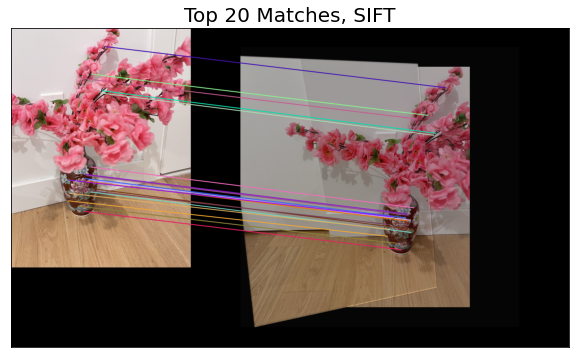

In [8]:
pb = np.clip(pb * 255.0, 0, 255).astype(np.uint8)
pb = cv2.copyMakeBorder(pb,200,200,500,500, cv2.BORDER_CONSTANT, value=(0, 0, 0))

#Clipping large image values before calling the compute_sift function again to compute keypoints between image 12 and 3 
kp23, des23, kp32, des32, matches23, drawn_image = compute_sift(img3, pb)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1,1,1), plt.imshow(cv2.cvtColor(drawn_image, cv2.COLOR_BGR2RGB))
plt.title("Top 20 Matches, SIFT", fontsize = 20), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Transformed Image 3'), ([], []), ([], []))

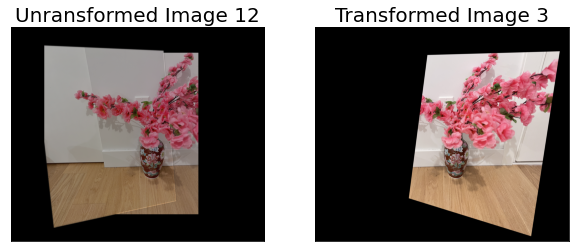

In [9]:
#Now finding the transform to fit our image
tran_img2, untran_img2, homography_matrix2, mask2, k1_2, k2_2 = find_homography(matches23, kp23, kp32, img3, pb)

(x, y, z) = np.shape(untran_img2)
#Manually removing artifects caused by pyramid blending before we stitch the images together
#Note that different valued levels affect the type of artifect
for i in range(x):
  for j in range(y):
     if untran_img2[i][j][0]==5 and untran_img2[i][j][1]==5 and untran_img2[i][j][2]==5:
       untran_img2[i][j][0] = 0
       untran_img2[i][j][1] = 0 
       untran_img2[i][j][2] = 0

fig = plt.figure(figsize=(15, 15))
plt.subplot(1,2,1), plt.imshow(cv2.cvtColor(untran_img2, cv2.COLOR_BGR2RGB))
plt.title("Unransformed Image 12", fontsize = 20), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2), plt.imshow(cv2.cvtColor(tran_img2, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image 3", fontsize = 20), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Transformed Image 123'), ([], []), ([], []))

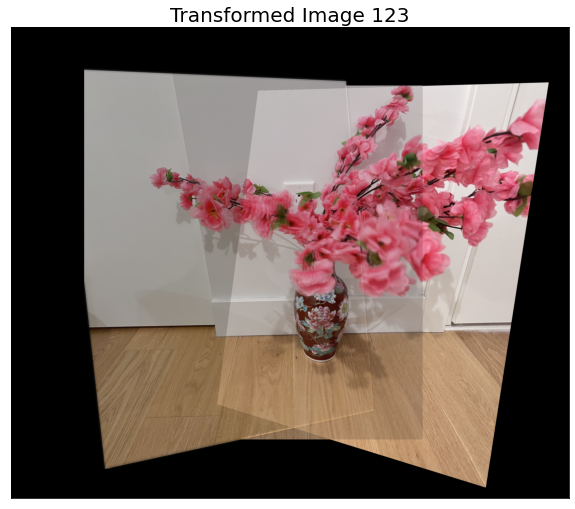

In [10]:
def stitch_images(img1, img2):
  (x, y, z) = np.shape(img2)
  output = np.zeros(img2.shape)
         
  for i in range(x):
      for j in range(y):
        #If both areas in the image are black, make output image area black
        if (img2[i][j][0]==0 and img2[i][j][1]==0 and img2[i][j][2]==0) and (img1[i][j][0]==0 and img1[i][j][1]==0 and img1[i][j][2]==0) :
          output[i][j][0]=0
          output[i][j][1]=0
          output[i][j][2]=0
        #If only image 2 is black, then get values from img1
        elif (img2[i][j][0]==0 and img2[i][j][1]==0 and img2[i][j][2]==0):
          output[i][j][0] = img1[i][j][0]
          output[i][j][1] = img1[i][j][1]
          output[i][j][2] = img1[i][j][2]
          #If only image 1 is black, get values from img2
        elif img1[i][j][0]==0 and img1[i][j][1]==0 and img1[i][j][2]==0:
          output[i][j][0] = img2[i][j][0]
          output[i][j][1] = img2[i][j][1]
          output[i][j][2] = img2[i][j][2]
          #Else linear blend with equal weight
        else:
          output[i][j][0] = (int(int(img2[i][j][0]) + int(img1[i][j][0]))/2)
          output[i][j][1] = (int(int(img2[i][j][1]) + int(img1[i][j][1]))/2)
          output[i][j][2] = (int(int(img2[i][j][2]) + int(img1[i][j][2]))/2)
  return output

resulting_img = stitch_images(tran_img2, untran_img2)

resulting_img = resulting_img.astype('float32')

resulting_img = cv2.normalize(resulting_img, None, 0, 1, cv2.NORM_MINMAX)

fig = plt.figure(figsize=(10, 10))
plt.subplot(1,1,1), plt.imshow(cv2.cvtColor(resulting_img, cv2.COLOR_BGR2RGB))
plt.title("Transformed Image 123", fontsize = 20), plt.xticks([]), plt.yticks([])



###**3.Face Detection**

<p align="justify">For this question, we loaded all 400 images from the celeb_faces folder into a Python dataset and converted each image to grayscale, flattened it, and appended it to a large array. We then iterated through each of the images to detect faces using the CascadeClassifier from the Open CV library. Once we detected all the faces in the 400 images, we discarded any images that contained more than one face detection. This is to remove any images that have false detections. Next, we calculated the mean (average) face image of the training set using the function compute_mean_face, which calls the numpy mean() function. 

<p align="justify">To find the eigenvectors and eigenvalues for the data set, we first calculated the covariance by multiplying D by D.Transpose, where D is found by subtracting the mean face from large array. Then, we passed our covariance matrix to the function np.linalg.eigh, to retrieve the eigenvectors and eigenvalues. We then ordered the eigenvectors by descending order of eigenvalues and printed out the first four eigenvalues. 

<p align="justify">We then attempted to reconstruct the eigenfaces according to varying numbers of indexes, which included 20, 10 and 5. We did this by reshaping the eigenvectors to the same size as the mean face and then appending the images to the same array. 

<p align="justify">Lastly, we uploaded a folder named "test" that contains an image named "face_test.jpeg". This image was then ran through our face detect technique pursued in tutorial 5 of ECSE415 in order to find the faces within the image. More specifically, we used the function detect_faces() which we used to find faces in the training images. As seen from our results our face detection was successful in detecting the human face.[5]

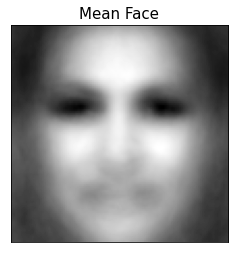

In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            images.append(img)
    return images

def detect_faces(image):
    # Load the pre-trained Haar Cascade face detection model
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5)

    return faces

def compute_mean_face(images, faces):
    # Determine the size of the output mean face
    mean_shape = np.round(np.mean([face[2:] for face in faces], axis=0)).astype(int)

    # Create an array to store the flattened face images
    face_data = np.empty((len(faces), mean_shape[0]*mean_shape[1]), dtype=np.float32)

    # Flatten and resize each face image and store it in the face_data array
    for i, (x, y, w, h) in enumerate(faces):
        face_image = images[i][y:y+h, x:x+w]
        face_image = cv2.resize(face_image, mean_shape[::-1])
        face_data[i,:] = face_image.flatten()

    # Compute the mean face
    mean_face = np.mean(face_data, axis=0).reshape(mean_shape)

    return mean_face, face_data

# Load the images from a folder
folder = "/content/drive/MyDrive/ECSE_415_W_2023/Assignments/Assignment2/Q3/celeb_faces"
images = load_images_from_folder(folder)

# Detect faces in each image
faces = []
for image in images:
    detected_faces = detect_faces(image)
    if len(detected_faces) == 1: # Only use images with exactly one face
        faces.append(detected_faces[0])
images = [images[i] for i in range(len(faces))] # Remove images without exactly one face

# Compute the mean face
mean_face, flat_face_data = compute_mean_face(images, faces)

# Display the mean face
plt.imshow(mean_face, cmap='gray')
plt.title("Mean Face", fontsize = 15), plt.xticks([]), plt.yticks([])
plt.show()

In [14]:
centered_face_data = flat_face_data - mean_face.flatten()

# Calculate the covariance matrix of the centered dataset
covariance_matrix = np.matmul(centered_face_data.T, centered_face_data)

# Find the eigenvectors and eigenvalues of the covariance matrix 
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# Sort the eigenvectors and eigenvalues in descending order based on the eigenvalues
sort_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sort_indices]
eigenvectors = eigenvectors[:, sort_indices]

# Print the first 4 eigenvalues
print("First 4 eigenvalues:", eigenvalues[:4])

First 4 eigenvalues: [3.1210335e+09 1.6872831e+09 1.4229125e+09 7.0160262e+08]


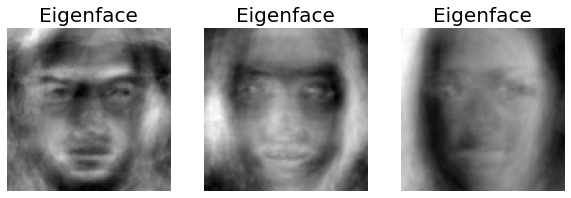

In [15]:
#Construct the eigenfaces from the eigenvectors
eigenfaces = []
k = 20
 
for i in range(k):
    eigenface = eigenvectors[:,i].reshape(mean_face.shape)
    eigenfaces.append(eigenface)
    eigenfaces

# Define the indices of the images you want to display
indices = [19, 9, 4]

# Create a figure and set the size of the figure
fig = plt.figure(figsize=(10, 3))

# Loop through the selected indices and display the corresponding images on the same row
for i, idx in enumerate(indices):
    # Create a subplot for each image
    ax = fig.add_subplot(1, len(indices), i+1)
    # Display the image
    
    ax.imshow(eigenfaces[idx], cmap='gray')
    plt.title("Eigenface", fontsize = 20), plt.xticks([]), plt.yticks([])
    # Turn off the axis labels
    ax.axis('off')

# Show the figure
plt.show()

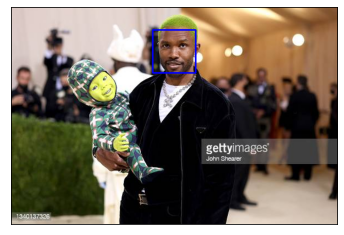

In [17]:
tst_path = "/content/drive/MyDrive/ECSE_415_W_2023/Assignments/Assignment2/Q3/test/face_test.jpeg"
test_gray = cv2.imread(tst_path)


faces = detect_faces(test_gray)

for (x,y,w,h) in faces:
    test_gray = cv2.rectangle(test_gray,(x,y),(x+w,y+h),(255,0,0),2)

plt.imshow(cv2.cvtColor(test_gray, cv2.COLOR_BGR2RGB))
plt.xticks(())
plt.yticks(())
plt.show()


###Works Cited: 
[1] Tomasi, C., & Manduchi, R. (1998). Bilateral filtering for gray and color images. In Proceedings of the 6th International Conference on Computer Vision (pp. 839-846). IEEE.

[2] S. Routray, A. K. Ray and C. Mishra, "Analysis of various image feature extraction methods against noisy image: SIFT, SURF and HOG," 2017 Second International Conference on Electrical, Computer and Communication Technologies (ICECCT), Coimbatore, India, 2017, pp. 1-5, doi: 10.1109/ICECCT.2017.8117846.

[3] Gandhi, N. (2017). Function name Laplacian_blending. [Computer software]. GitHub. https://github.com/nishagandhi/Panoramas-and-Image-Alignment/blob/master/main.py


[4] Brown, M., & Lowe, D. G. (2002). Invariant features from interest point groups. In Proceedings of the 2002 IEEE Computer Society Conference on Computer Vision and Pattern Recognition (CVPR 2002) (Vol. 2, pp. 761-767). IEEE.

[5] OpenCV, “OpenCV,” opencv.org. https://docs.opencv.org/4.6.0/ ‌
